In [15]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [16]:
df_movies=pd.read_csv("ml-latest-small/movies.csv")
rating_data=pd.read_csv("ml-latest-small/ratings.csv")

In [17]:
df_movies.shape

(9742, 3)

In [18]:
unique_movies=df_movies['movieId'].unique().tolist()
len(unique_movies)

9742

In [19]:
rating_data.shape

(100836, 4)

In [20]:
rating_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [21]:
rating_data['rating'].min()

0.5

In [22]:
rating_data['rating'].max()

5.0

In [23]:
rating_data.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [24]:
movielens_dataset=df_movies.merge(rating_data,on='movieId',how='inner')
movielens_dataset.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [25]:
del movielens_dataset['timestamp']
movielens_dataset.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


In [26]:
unique_users = movielens_dataset['userId'].unique().tolist()
len(unique_users)

610

In [27]:
most_rated_movie=movielens_dataset.groupby('title').size().sort_values(ascending=False)
most_rated_movie.head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
dtype: int64

In [28]:
movielens_dataset.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


In [29]:
movielens_dataset.groupby('userId').size().head()

userId
1    232
2     29
3     39
4    216
5     44
dtype: int64

In [30]:
user_rating_info=movielens_dataset.groupby('userId').size()
user_rating_info.describe()


count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
dtype: float64

In [31]:
#census of genre
genre_labels = set()
for s in movielens_dataset['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [32]:
keyword_count = dict()
for genre in genre_labels:
    keyword_count[genre]=0
for keyword in movielens_dataset['genres'].str.split('|'):
    for genre in keyword:
        if pd.notnull(genre):
            keyword_count[genre]+=1

In [33]:
del keyword_count['(no genres listed)']
keyword_count

{'Fantasy': 11834,
 'Romance': 18124,
 'Musical': 4138,
 'Animation': 6988,
 'Action': 30635,
 'Thriller': 26452,
 'Mystery': 7674,
 'Crime': 16681,
 'Comedy': 39053,
 'War': 4859,
 'Children': 9208,
 'Documentary': 1219,
 'Film-Noir': 870,
 'Horror': 7291,
 'Adventure': 24161,
 'Western': 1930,
 'Drama': 41928,
 'Sci-Fi': 17243,
 'IMAX': 4145}

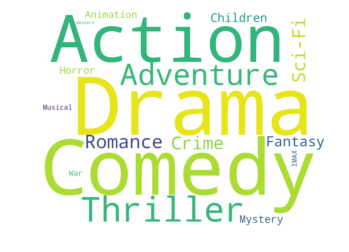

In [35]:
from PIL import Image
from wordcloud import WordCloud
wordcloud = WordCloud(width=2000,height=1500, max_words=1628,relative_scaling=0.7,
                      background_color='white',min_font_size = 25,normalize_plurals=False)
wordcloud.generate_from_frequencies(keyword_count)

plt.pyplot.imshow(wordcloud, interpolation='bilinear')
plt.pyplot.axis("off")
plt.pyplot.show()

In [36]:
df_movies['year']=df_movies['title'].str.extract('.*\((.*)\).*')
df_movies.tail()

,movieId,title,genres,year
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,1991


In [37]:
year_analysis=df_movies.groupby('year').size()
year_analysis.tail()

year
2014    278
2015    274
2016    218
2017    147
2018     41
dtype: int64

In [38]:
year_df=pd.DataFrame(year_analysis).reset_index()
year_df.columns=['year','frequency']
year_df.shape

(107, 2)

In [39]:
year_df=year_df[year_df.frequency > 40].sort_values(by=['year'],ascending=True)
year_df.head()

,year,frequency
51,1964,43
52,1965,47
53,1966,42
54,1967,42
55,1968,42


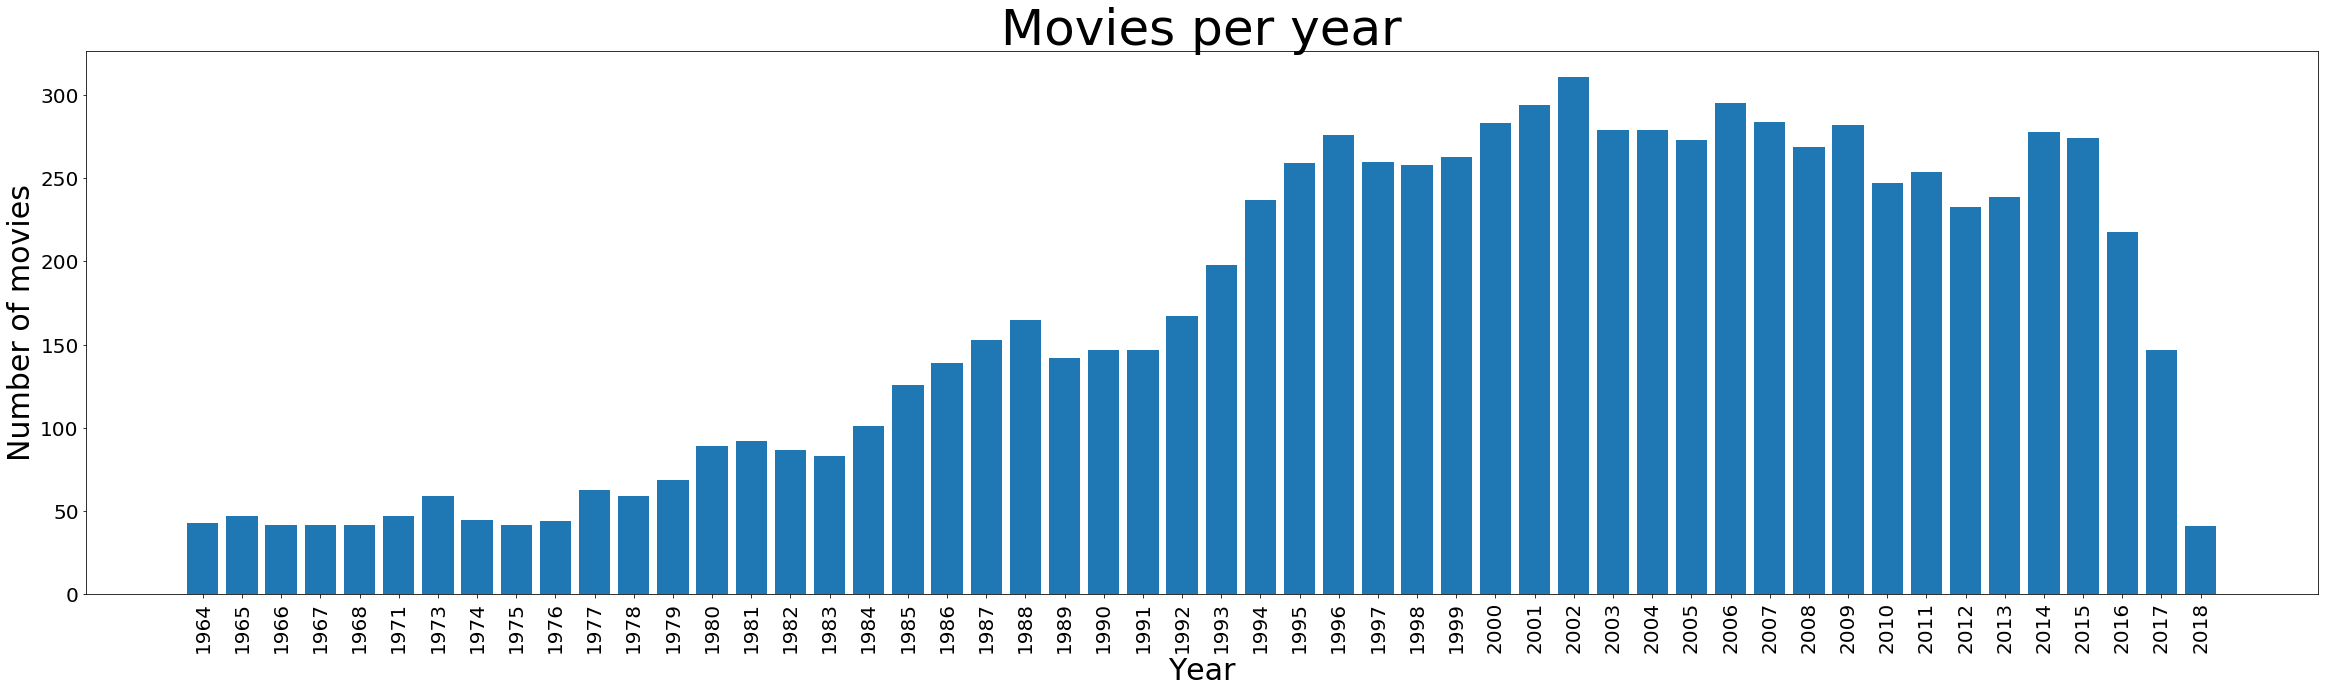

In [40]:
#plt.pyplot.bar(year_df['year'],year_df['frequency'],align='center')
x=year_df['year']
y=year_df['frequency']
plt.pyplot.figure(figsize=(40,10))
plt.pyplot.title('Movies per year',fontsize=50)
plt.pyplot.xticks(rotation=90,fontsize=20)
plt.pyplot.yticks(fontsize=20)
plt.pyplot.xlabel('Year',fontsize=30)
plt.pyplot.ylabel('Number of movies',fontsize=30)
plt.pyplot.bar(x,y)
plt.pyplot.show()